# Collecting statistics from the temporal evolution of the tumor cell fraction

## Import libraries

In [1]:
# %matplotlib notebook
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [493]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 6

# output_folder = "output_Live/"
# output_folder = "output_Ki67_Basic/"
# output_folder = "output_Ki67_Advanced/"
# output_folder = "output_Flow_Cytometry/"
output_folder = "output_Separated_Flow_Cytometry_dt6_NC200_R10/"

## List output folders

In [494]:
## Type pyMCDS. and hit the tab key to see methods 

sorted(os.listdir("./"+output_folder))

['absolute_error.csv',
 'absolute_error.pdf',
 'convergence_fraction.pdf',
 'cost.csv',
 'csse.csv',
 'csse.pdf',
 'data_fraction.csv',
 'data_fraction_std.csv',
 'data_population.csv',
 'data_population_std.csv',
 'ergodic_mean.pdf',
 'fraction_comparison.pdf',
 'geweke.pdf',
 'output_R00',
 'output_R01',
 'output_R02',
 'output_R03',
 'output_R04',
 'output_R05',
 'output_R06',
 'output_R07',
 'output_R08',
 'output_R09',
 'squared_error.csv',
 'stochastic_fraction.pdf',
 'stochastic_population.pdf']

## List *.xml* output files from one replicate

In [495]:
## Type pyMCDS. and hit the tab key to see methods 

file_list = []
for file in os.listdir("./"+output_folder+"output_R00/"):
    if file.endswith(".xml"):
        file_list.append(os.path.join("./"+output_folder+"output_R00/", file))
print(sorted(file_list))

['./output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/PhysiCell_settings_Separated_Flow_Cytometry_without_o2_apop_nec.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/final.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000000.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000001.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000002.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000003.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000004.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000005.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000006.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000007.xml', './output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000008.

## Compute the number of each tumor cell phenotype over all replicates and simulation times

In [496]:
num_replicates = 10;
last_index = 120;

times = np.zeros( last_index+1 ); 
if cycle_model == 0:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_premitotic_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_postmitotic_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 1:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 2:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 5:
    live_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 6:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
else:
    print("Unrecognized cell cycle model.")
apoptotic_count = np.zeros( (num_replicates, last_index+1) ); 
necrotic_count = np.zeros( (num_replicates, last_index+1) ); 

for id_replicate in range(num_replicates):
    folder_name = output_folder+"output_R"+str("%02d"%id_replicate)+'/'
    for n in range( 0, last_index+1 ):
        filename = 'output'+"%08i"%n+'.xml'
        mcds = pyMCDS(filename, folder_name)

        times[n] = mcds.get_time()
        cp = mcds.data['discrete_cells']['current_phase']
        if cycle_model == 0:
            Ki67_negative = np.argwhere( cp == 3 ).flatten()
            Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
            Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()

            Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
            Ki67_positive_premitotic_count[id_replicate][n] = len( Ki67_positive_premitotic )
            Ki67_positive_postmitotic_count[id_replicate][n] = len( Ki67_positive_postmitotic )
        elif cycle_model == 1:
            Ki67_negative = np.argwhere( cp == 3 ).flatten()
            Ki67_positive = np.argwhere( cp == 2 ).flatten()

            Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
            Ki67_positive_count[id_replicate][n] = len( Ki67_positive )
        elif cycle_model == 2:
            G0G1_phase = np.argwhere( cp == 4 ).flatten()
            S_phase = np.argwhere( cp == 10 ).flatten()
            G2M_phase = np.argwhere( cp == 11 ).flatten()

            G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
            S_phase_count[id_replicate][n] = len( S_phase )
            G2M_phase_count[id_replicate][n] = len( G2M_phase )
        elif cycle_model == 5:
            live = np.argwhere( cp == 14 ).flatten()

            live_count[id_replicate][n] = len( live )
        elif cycle_model == 6:
            G0G1_phase = np.argwhere( cp == 4 ).flatten()
            S_phase = np.argwhere( cp == 10 ).flatten()
            G2_phase = np.argwhere( cp == 12 ).flatten()
            M_phase = np.argwhere( cp == 13 ).flatten()

            G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
            S_phase_count[id_replicate][n] = len( S_phase )
            G2_phase_count[id_replicate][n] = len( G2_phase )
            M_phase_count[id_replicate][n] = len( M_phase )
        else:
            print("Unrecognized cell cycle model.")
        apoptotic = np.argwhere( cp == 100 ).flatten()
        necrotic = np.argwhere( cp == 103 ).flatten()

        apoptotic_count[id_replicate][n] = len( apoptotic )
        necrotic_count[id_replicate][n] = len( necrotic )

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000000.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000000_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000001.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000001_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000002.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000020_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000021.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000021_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000022.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000022_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000041.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000041_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000042.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000042_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000043.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000061_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000062.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000062_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000063.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000063_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000083_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000084.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000084_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000084_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000085.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000085_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000085_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000104_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000105.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000105_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000106.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R00/output00000106_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000003_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000004.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000004_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000005.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000005_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000005_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000023_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000024.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000024_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000024_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000025.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000025_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000025_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000045_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000046.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000046_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000047.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000047_microenviro

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000067_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000068.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000068_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000069.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000069_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000088_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000089.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000089_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000090.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000090_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000091.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000108_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000109.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000109_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000110.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000110_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R01/output00000110_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000007_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000008.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000008_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000008_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000009.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000009_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000009_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000028_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000029.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000029_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000030.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000030_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000050_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000050_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000051.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000051_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000052.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000052_microenviro

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000071_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000072.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000072_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000073.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000073_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000091_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000092.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000092_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000092_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000093.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000093_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000111_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000112.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000112_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000112_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000113.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000113_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R02/output00000113_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000010_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000011.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000011_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000012.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000012_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000030_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000031.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000031_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000031_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000032.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000032_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000051_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000052.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000052_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000053.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000053_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000053_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000071_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000072.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000072_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000073.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000073_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000074.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000092_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000093.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000093_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000094.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000094_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000113_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000113_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000114.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000114_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000114_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000115.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R03/output00000115_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Sep

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000013_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000014.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000014_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000015.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Sep

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000033_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000034.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000034_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000035.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000035_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000035_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000036.xml


Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000053_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000054.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000054_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000054_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000055.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000055_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000055_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000056.xml


Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000073_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000074.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000074_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000075.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000075_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000076.xml


Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000094.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000094_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000095.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000095_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000096.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000115_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000116.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000116_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000117.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000117_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R04/output00000117_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000015_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000016.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000016_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000017.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000017_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000035_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000036.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000036_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000036_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000037.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000037_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000037_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000055_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000056.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000056_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000056_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000057.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000057_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000057_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000058.xml


Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000076.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000076_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000077.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000077_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000078.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000097.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000097_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000098.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000098_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000099.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000118.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000118_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000118_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000119.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000119_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/output00000120.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R05/initial_mesh0.mat
Reading

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000017_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000018.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000018_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000019.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000019_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000020.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000037_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000038.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000038_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000039.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000039_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000058_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000059.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000059_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000060.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000060_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000078_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000079.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000079_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000080.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000080_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000081.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000098_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000099.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000099_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000099_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000100.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000100_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000118_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000119.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000119_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000120.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R06/output00000120_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000000.xml


Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000018.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000018_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000019.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000019_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000020.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000038_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000039.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000039_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000040.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000040_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000058_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000059.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000059_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000060.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000060_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000078_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000079.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000079_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000080.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000080_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000098_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000099.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000099_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000099_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000100.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000100_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000118_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000119.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000119_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000120.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R07/output00000120_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000018_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000019.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000019_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000020.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000020_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000038_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000039.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000039_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000040.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000040_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000041.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000058_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000059.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000059_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000060.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000060_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000079_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000080.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000080_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000081.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000081_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Sep

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000100_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000101.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000101_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000101_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000102.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000102_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R08/output00000120_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000000.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000000_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000001.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000001_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000020_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000021.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000021_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000022.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000022_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000040_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000041.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000041_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000042.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000042_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000060_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000061.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000061_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000062.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000062_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000063.xml


working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000081_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000082.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000082_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000082_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000083.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000083_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000083_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000102_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000103.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000103_cells.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000104.xml
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/initial_mesh0.mat
Reading output_Separated_Flow_Cytometry_dt6_NC200_R10/output_R09/output00000104_microenviro

## Compute tumor cell fraction over all replicates and simulation times

In [497]:
if cycle_model == 0:
    Ki67_negative_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_premitotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_postmitotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 1:
    Ki67_negative_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 2:
    G0G1_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    G2M_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 5:
    live_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 6:
    G0G1_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    G2_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    M_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
else:
    print("Unrecognized cell cycle model.")
apoptotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
necrotic_fraction = np.zeros( (num_replicates, last_index+1) ); 

for id_replicate in range(num_replicates):
    if cycle_model == 0:
        total_count = Ki67_negative_count[id_replicate,:] + Ki67_positive_premitotic_count[id_replicate,:] + Ki67_positive_postmitotic_count[id_replicate,:] + apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:];

        Ki67_negative_fraction[id_replicate,:] = Ki67_negative_count[id_replicate,:]/total_count;
        Ki67_positive_premitotic_fraction[id_replicate,:] = Ki67_positive_premitotic_count[id_replicate,:]/total_count;
        Ki67_positive_postmitotic_fraction[id_replicate,:] = Ki67_positive_postmitotic_count[id_replicate,:]/total_count;
    elif cycle_model == 1:
        total_count = Ki67_negative_count[id_replicate,:] + Ki67_positive_count[id_replicate,:] + apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:];

        Ki67_negative_fraction[id_replicate,:] = Ki67_negative_count[id_replicate,:]/total_count;
        Ki67_positive_fraction[id_replicate,:] = Ki67_positive_count[id_replicate,:]/total_count;
    elif cycle_model == 2:
        total_count = G0G1_phase_count[id_replicate,:] + S_phase_count[id_replicate,:] + G2M_phase_count[id_replicate,:] + apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:];

        G0G1_phase_fraction[id_replicate,:] = G0G1_phase_count[id_replicate,:]/total_count;
        S_phase_fraction[id_replicate,:] = S_phase_count[id_replicate,:]/total_count;
        G2M_phase_fraction[id_replicate,:] = G2M_phase_count[id_replicate,:]/total_count;
    elif cycle_model == 5:
        total_count = live_count[id_replicate,:] + apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:];

        live_fraction[id_replicate,:] = live_count[id_replicate,:]/total_count;
    elif cycle_model == 6:
        total_count = G0G1_phase_count[id_replicate,:] + S_phase_count[id_replicate,:] + G2_phase_count[id_replicate,:] + M_phase_count[id_replicate,:] + apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:];

        G0G1_phase_fraction[id_replicate,:] = G0G1_phase_count[id_replicate,:]/total_count;
        S_phase_fraction[id_replicate,:] = S_phase_count[id_replicate,:]/total_count;
        G2_phase_fraction[id_replicate,:] = G2_phase_count[id_replicate,:]/total_count;
        M_phase_fraction[id_replicate,:] = M_phase_count[id_replicate,:]/total_count;
    else:
        print("Unrecognized cell cycle model.")
    apoptotic_fraction[id_replicate,:] = apoptotic_count[id_replicate,:]/total_count;
    necrotic_fraction[id_replicate,:] = necrotic_count[id_replicate,:]/total_count;

## Collect statistics from the tumor cell fraction

In [498]:
if cycle_model == 0:
    Ki67_negative_mean = np.mean(Ki67_negative_fraction, axis=0);
    Ki67_positive_premitotic_mean = np.mean(Ki67_positive_premitotic_fraction, axis=0);
    Ki67_positive_postmitotic_mean = np.mean(Ki67_positive_postmitotic_fraction, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_fraction, axis=0);
    Ki67_positive_premitotic_std = np.std(Ki67_positive_premitotic_fraction, axis=0);
    Ki67_positive_postmitotic_std = np.std(Ki67_positive_postmitotic_fraction, axis=0);
elif cycle_model == 1:
    Ki67_negative_mean = np.mean(Ki67_negative_fraction, axis=0);
    Ki67_positive_mean = np.mean(Ki67_positive_fraction, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_fraction, axis=0);
    Ki67_positive_std = np.std(Ki67_positive_fraction, axis=0);
elif cycle_model == 2:
    G0G1_phase_mean = np.mean(G0G1_phase_fraction, axis=0);
    S_phase_mean = np.mean(S_phase_fraction, axis=0);
    G2M_phase_mean = np.mean(G2M_phase_fraction, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_fraction, axis=0);
    S_phase_std = np.std(S_phase_fraction, axis=0);
    G2M_phase_std = np.std(G2M_phase_fraction, axis=0);
elif cycle_model == 5:
    live_mean = np.mean(live_fraction, axis=0);
    
    live_std = np.std(live_fraction, axis=0);
elif cycle_model == 6:
    G0G1_phase_mean = np.mean(G0G1_phase_fraction, axis=0);
    S_phase_mean = np.mean(S_phase_fraction, axis=0);
    G2_phase_mean = np.mean(G2_phase_fraction, axis=0);
    M_phase_mean = np.mean(M_phase_fraction, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_fraction, axis=0);
    S_phase_std = np.std(S_phase_fraction, axis=0);
    G2_phase_std = np.std(G2_phase_fraction, axis=0);
    M_phase_std = np.std(M_phase_fraction, axis=0);
else:
    print("Unrecognized cell cycle model.")
apoptotic_mean = np.mean(apoptotic_fraction, axis=0);
necrotic_mean = np.mean(necrotic_fraction, axis=0);

apoptotic_std = np.std(apoptotic_fraction, axis=0);
necrotic_std = np.std(necrotic_fraction, axis=0);

## Plot the temporal evolution of the tumor cell fraction

<Figure size 432x288 with 0 Axes>

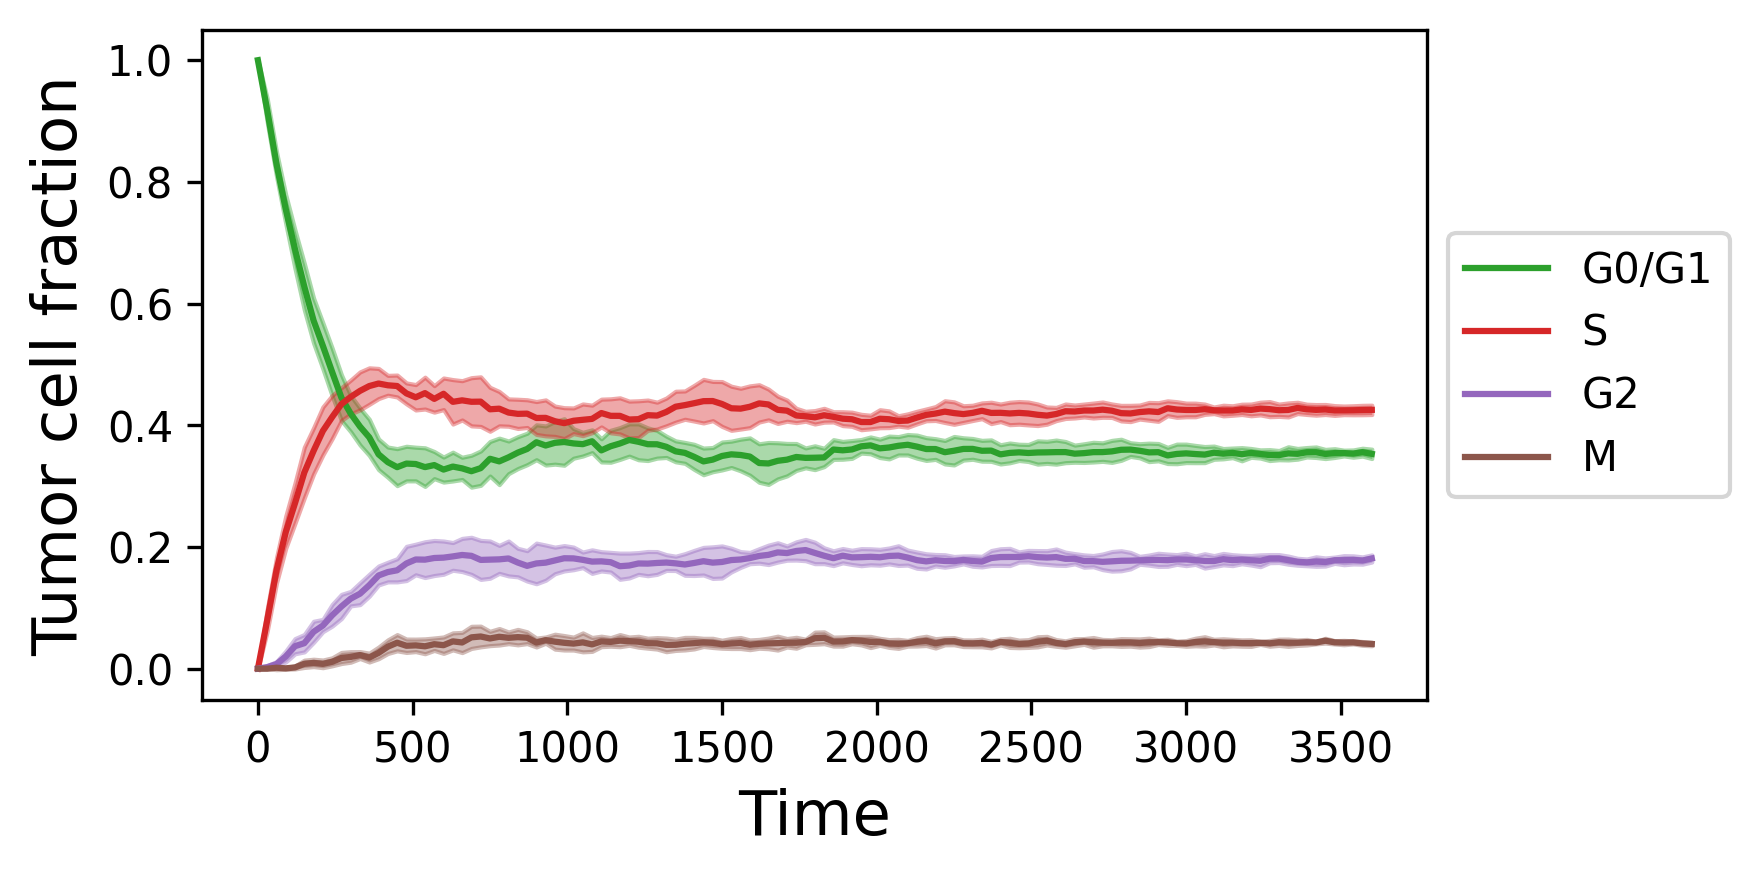

In [499]:
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
# plt.plot( times, apoptotic_mean , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( times, necrotic_mean , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

# plt.fill_between( times, apoptotic_mean-apoptotic_std, apoptotic_mean+apoptotic_std, color = "tab:blue", alpha = 0.4 );
# plt.fill_between( times, necrotic_mean-necrotic_std, necrotic_mean+necrotic_std, color = "tab:orange", alpha = 0.4 );
if cycle_model == 0:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_premitotic_mean-Ki67_positive_premitotic_std, Ki67_positive_premitotic_mean+Ki67_positive_premitotic_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_postmitotic_mean-Ki67_positive_postmitotic_std, Ki67_positive_postmitotic_mean+Ki67_positive_postmitotic_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_mean-Ki67_positive_std, Ki67_positive_mean+Ki67_positive_std, color = "tab:red", alpha = 0.4 );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_mean , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2M_phase_mean-G2M_phase_std, G2M_phase_mean+G2M_phase_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 5:
    plt.plot( times, live_mean , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.fill_between( times, live_mean-live_std, live_mean+live_std, color = "tab:green", alpha = 0.4 );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_mean , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_mean , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2_phase_mean-G2_phase_std, G2_phase_mean+G2_phase_std, color = "tab:purple", alpha = 0.4 );
    plt.fill_between( times, M_phase_mean-M_phase_std, M_phase_mean+M_phase_std, color = "tab:brown", alpha = 0.4 );
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Temporal evolution of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig(os.path.join(output_folder, "stochastic_fraction.pdf"), bbox_inches = 'tight')

## Write a *.csv* output file

In [500]:
if cycle_model == 0:
    output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_premitotic_mean.flatten(), Ki67_positive_postmitotic_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_mean, Ki67_positive_premitotic_mean, Ki67_positive_postmitotic_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 1:
    output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_mean.flatten(), 
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_mean, Ki67_positive_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 2:
    output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2M_phase_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_mean, S_phase_mean, G2M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 5:
    output_array = np.column_stack((times.flatten(), live_mean.flatten(), 
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, live_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 6:
    output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2_phase_mean.flatten(), M_phase_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_mean, S_phase_mean, G2_phase_mean, M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
else:
    print("Unrecognized cell cycle model.")

In [501]:
if cycle_model == 0:
    output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_premitotic_std.flatten(), Ki67_positive_postmitotic_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_std, Ki67_positive_premitotic_std, Ki67_positive_postmitotic_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 1:
    output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_std.flatten(), 
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_std, Ki67_positive_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 2:
    output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2M_phase_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_std, S_phase_std, G2M_phase_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 5:
    output_array = np.column_stack((times.flatten(), live_std.flatten(), 
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, live_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 6:
    output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2_phase_std.flatten(), M_phase_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_std, S_phase_std, G2_phase_std, M_phase_std, apoptotic_std, necrotic_std", comments='')
else:
    print("Unrecognized cell cycle model.")

## Check convergence of the tumor cell fraction

In [506]:
def compare_to_mean(tumor_cell_fraction, label, tol = 2.5e-2):
    conv_time = -1
    for i in range(tumor_cell_fraction.size-1, -1, -1):
        mean = np.mean(tumor_cell_fraction[i:])
        if abs(mean - tumor_cell_fraction[i]) > tol:
            conv_time = times[i] + 1
            print(label + " fraction converged at t=" + str(conv_time) + " min")
            break
    if conv_time == -1:
        print(label + " fraction did not converge")
        
    return conv_time

In [507]:
apoptotic_conv_time = compare_to_mean(apoptotic_mean, 'Apoptotic');
necrotic_conv_time = compare_to_mean(necrotic_mean, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_conv_time = compare_to_mean(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_conv_time = compare_to_mean(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_conv_time = compare_to_mean(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_mean, 'S');
    G2M_phase_conv_time = compare_to_mean(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_conv_time = compare_to_mean(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_mean, 'S');
    G2_phase_conv_time = compare_to_mean(G2_phase_mean, 'G2');
    M_phase_conv_time = compare_to_mean(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

Apoptotic fraction did not converge
Necrotic fraction did not converge
G0/G1 fraction converged at t=721.0 min
S fraction converged at t=601.0 min
G2 fraction converged at t=391.0 min
M fraction converged at t=241.0 min


## Plot convergence of the tumor cell fraction

<Figure size 432x288 with 0 Axes>

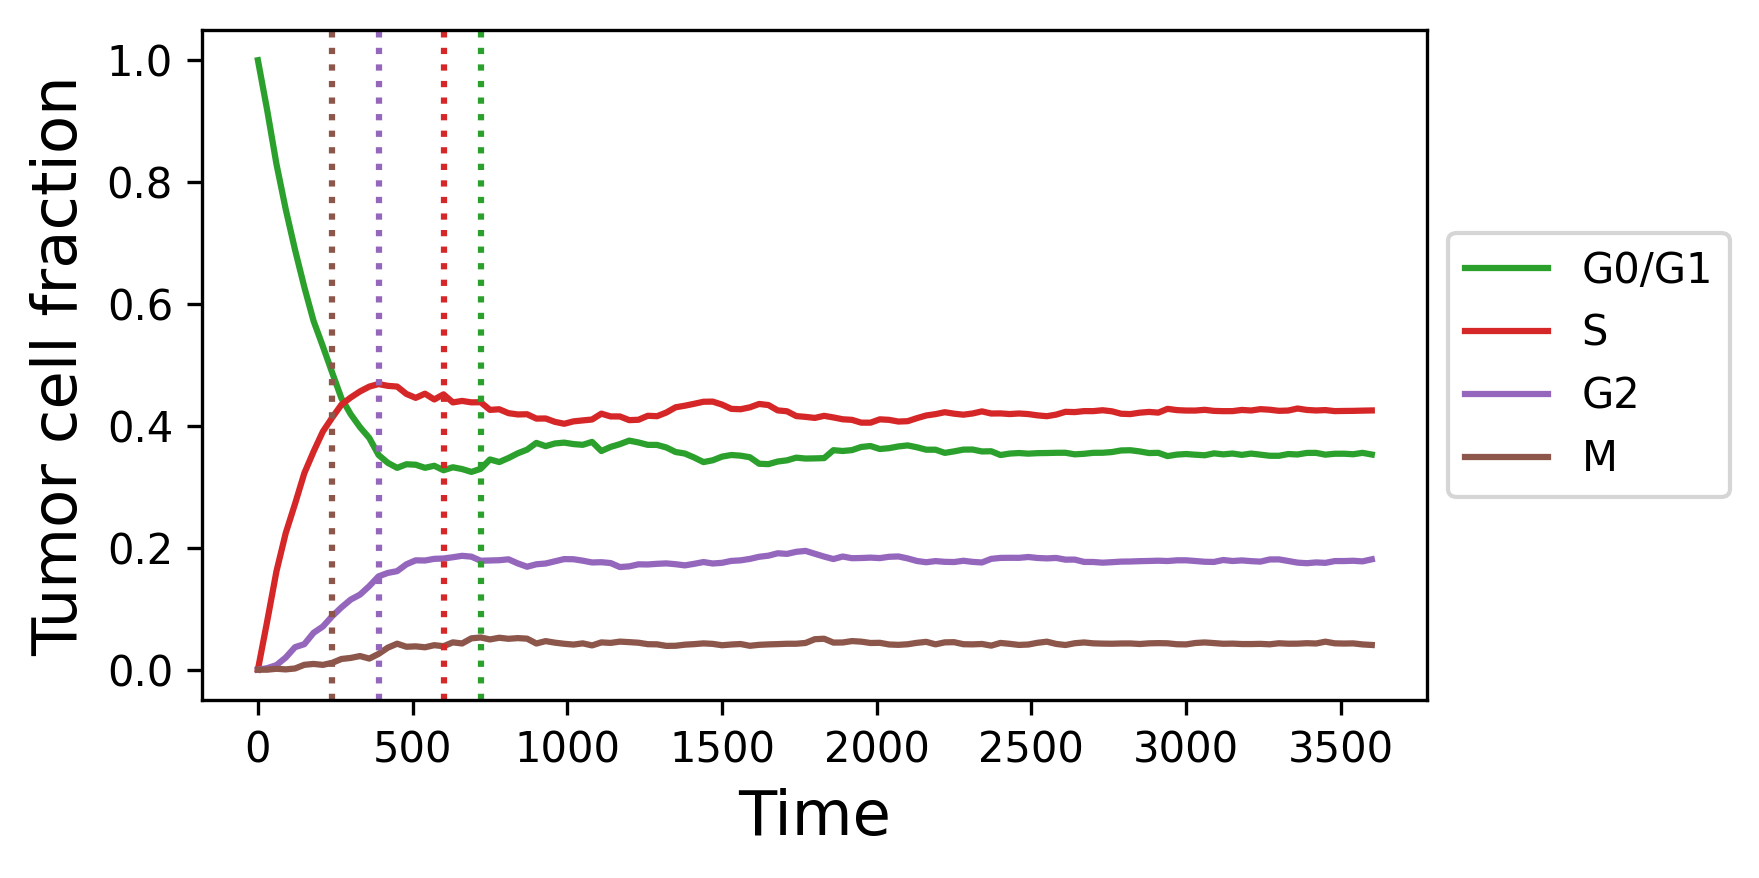

In [508]:
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
# plt.plot( times, apoptotic_mean , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( times, necrotic_mean , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
# if apoptotic_conv_time != -1:
#     plt.axvline(apoptotic_conv_time, color='tab:blue', linestyle=':')
# if necrotic_conv_time != -1:
#     plt.axvline(necrotic_conv_time, color='tab:orange', linestyle=':')
if cycle_model == 0:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );

    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:green', linestyle=':')
    if Ki67_positive_premitotic_conv_time != -1:
        plt.axvline(Ki67_positive_premitotic_conv_time, color='tab:red', linestyle=':')
    if Ki67_positive_postmitotic_conv_time != -1:
        plt.axvline(Ki67_positive_postmitotic_conv_time, color='tab:purple', linestyle=':')
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:green', linestyle=':')
    if Ki67_positive_conv_time != -1:
        plt.axvline(Ki67_positive_conv_time, color='tab:red', linestyle=':')
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_mean , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:green', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:red', linestyle=':')
    if G2M_phase_conv_time != -1:
        plt.axvline(G2M_phase_conv_time, color='tab:purple', linestyle=':')
elif cycle_model == 5:
    plt.plot( times, live_mean , '-', label='Live', color='tab:green', alpha=1.0 );
    
    if live_conv_time != -1:
        plt.axvline(live_conv_time, color='tab:green', linestyle=':')
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_mean , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_mean , '-', label='M', color='tab:brown', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:green', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:red', linestyle=':')
    if G2_phase_conv_time != -1:
        plt.axvline(G2_phase_conv_time, color='tab:purple', linestyle=':')
    if M_phase_conv_time != -1:
        plt.axvline(M_phase_conv_time, color='tab:brown', linestyle=':')
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Convergence of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig(os.path.join(output_folder, "convergence_fraction.pdf"), bbox_inches = 'tight')

## Compute Geweke convergence diagnosis

In [509]:
max_perc_to_discard = 0.4
max_size_to_discard = round(max_perc_to_discard*times.size)

def geweke(tumor_cell_fraction, label, rate_a = 0.1, rate_b = 0.5):
    relative_distances = np.zeros((max_size_to_discard,))
    for i in range(max_size_to_discard):
        window = np.delete(tumor_cell_fraction, slice(i), 0)

        ka = round(rate_a*window.size)
        kb = round(rate_b*window.size)

        subseq_a = window[:ka]
        subseq_b = window[(window.size-kb):]

        mean_a = np.mean(subseq_a)
        mean_b = np.mean(subseq_b)
        mean_total = np.mean(window)

        relative_distances[i] = abs((mean_a - mean_b)/mean_total)
    
    return relative_distances

In [510]:
# apoptotic_relative_distances = geweke(apoptotic_mean, 'Apoptotic');
# necrotic_relative_distances = geweke(necrotic_mean, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_relative_distances = geweke(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_relative_distances = geweke(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_relative_distances = geweke(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_relative_distances = geweke(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_relative_distances = geweke(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_relative_distances = geweke(G0G1_phase_mean, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_mean, 'S');
    G2M_phase_relative_distances = geweke(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_relative_distances = geweke(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_relative_distances = geweke(G0G1_phase_mean, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_mean, 'S');
    G2_phase_relative_distances = geweke(G2_phase_mean, 'G2');
    M_phase_relative_distances = geweke(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot Geweke convergence diagnosis

<Figure size 432x288 with 0 Axes>

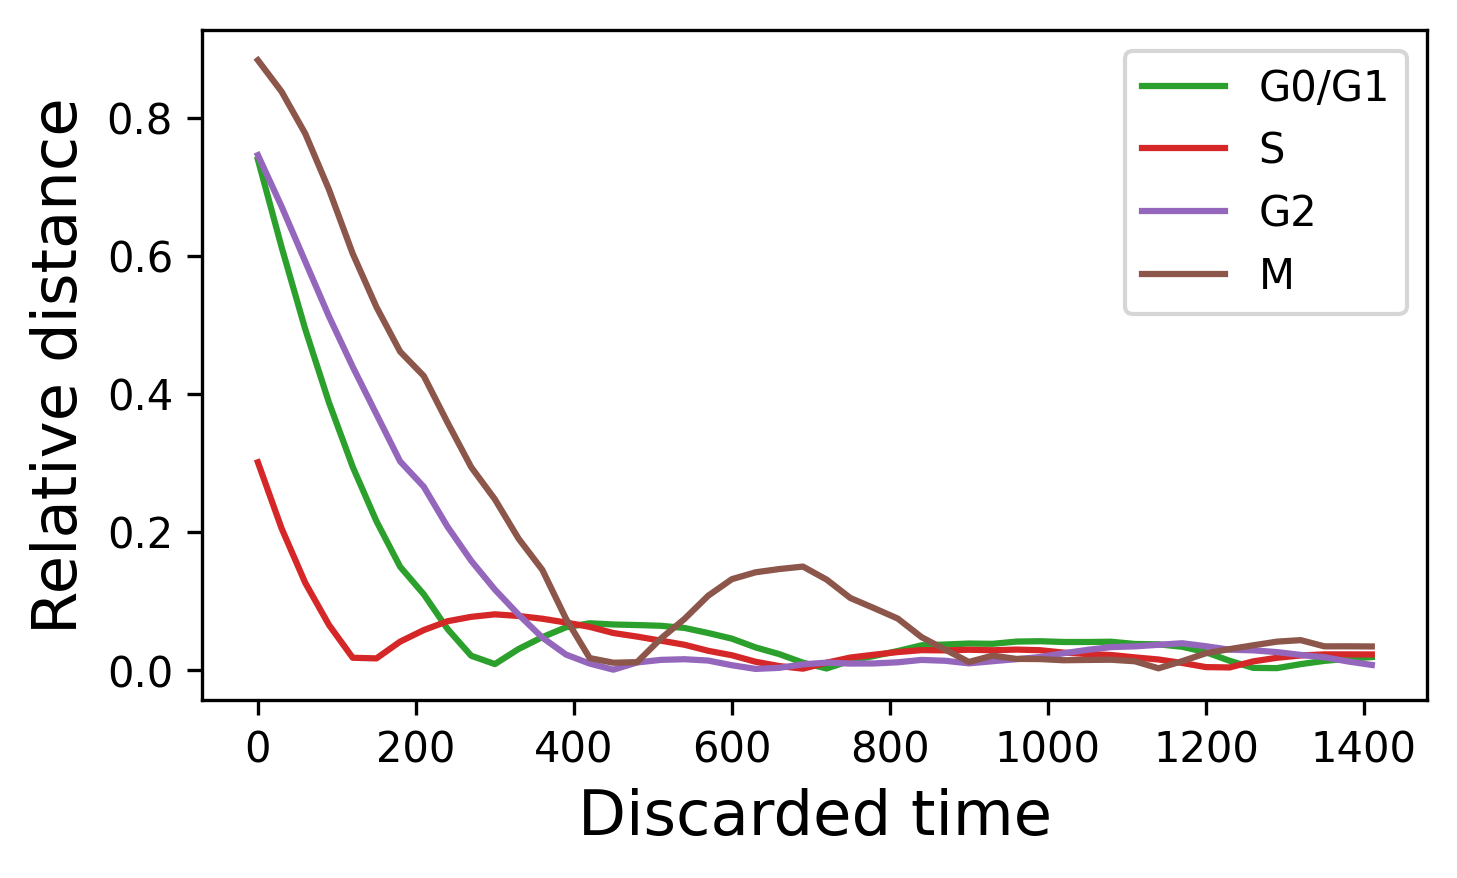

In [511]:
discarded_times = times[:max_size_to_discard]

plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
# plt.plot( discarded_times, apoptotic_relative_distances , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( discarded_times, necrotic_relative_distances , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
if cycle_model == 0:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_premitotic_relative_distances , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_postmitotic_relative_distances , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
elif cycle_model == 1:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_relative_distances , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
elif cycle_model == 2:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2M_phase_relative_distances , '-', label='G2/M', color='tab:purple', alpha=1.0 );
elif cycle_model == 5:
    plt.plot( discarded_times, live_relative_distances , '-', label='Live', color='tab:green', alpha=1.0 );
elif cycle_model == 6:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2_phase_relative_distances , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( discarded_times, M_phase_relative_distances , '-', label='M', color='tab:brown', alpha=1.0 );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

# plt.title( 'Geweke convergence diagnosis', size=20)
plt.xlabel( 'Discarded time', size=15 ) 
plt.ylabel( 'Relative distance', size=15 )
plt.savefig(os.path.join(output_folder, "geweke.pdf"), bbox_inches = 'tight')

## Compute ergodic means

In [512]:
def ergodic_mean(tumor_cell_fraction, label):
    ergodic_means = np.zeros((tumor_cell_fraction.size,))
    for i in range(tumor_cell_fraction.size):
        ergodic_means[i] = np.mean(tumor_cell_fraction[:(i+1)])
        
    return ergodic_means

In [513]:
apoptotic_ergodic_means = ergodic_mean(apoptotic_mean, 'Apoptotic');
necrotic_ergodic_means = ergodic_mean(necrotic_mean, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_ergodic_means = ergodic_mean(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_ergodic_means = ergodic_mean(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_ergodic_means = ergodic_mean(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_mean, 'S');
    G2M_phase_ergodic_means = ergodic_mean(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_ergodic_means = ergodic_mean(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_mean, 'S');
    G2_phase_ergodic_means = ergodic_mean(G2_phase_mean, 'G2');
    M_phase_ergodic_means = ergodic_mean(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot ergodic means

<Figure size 432x288 with 0 Axes>

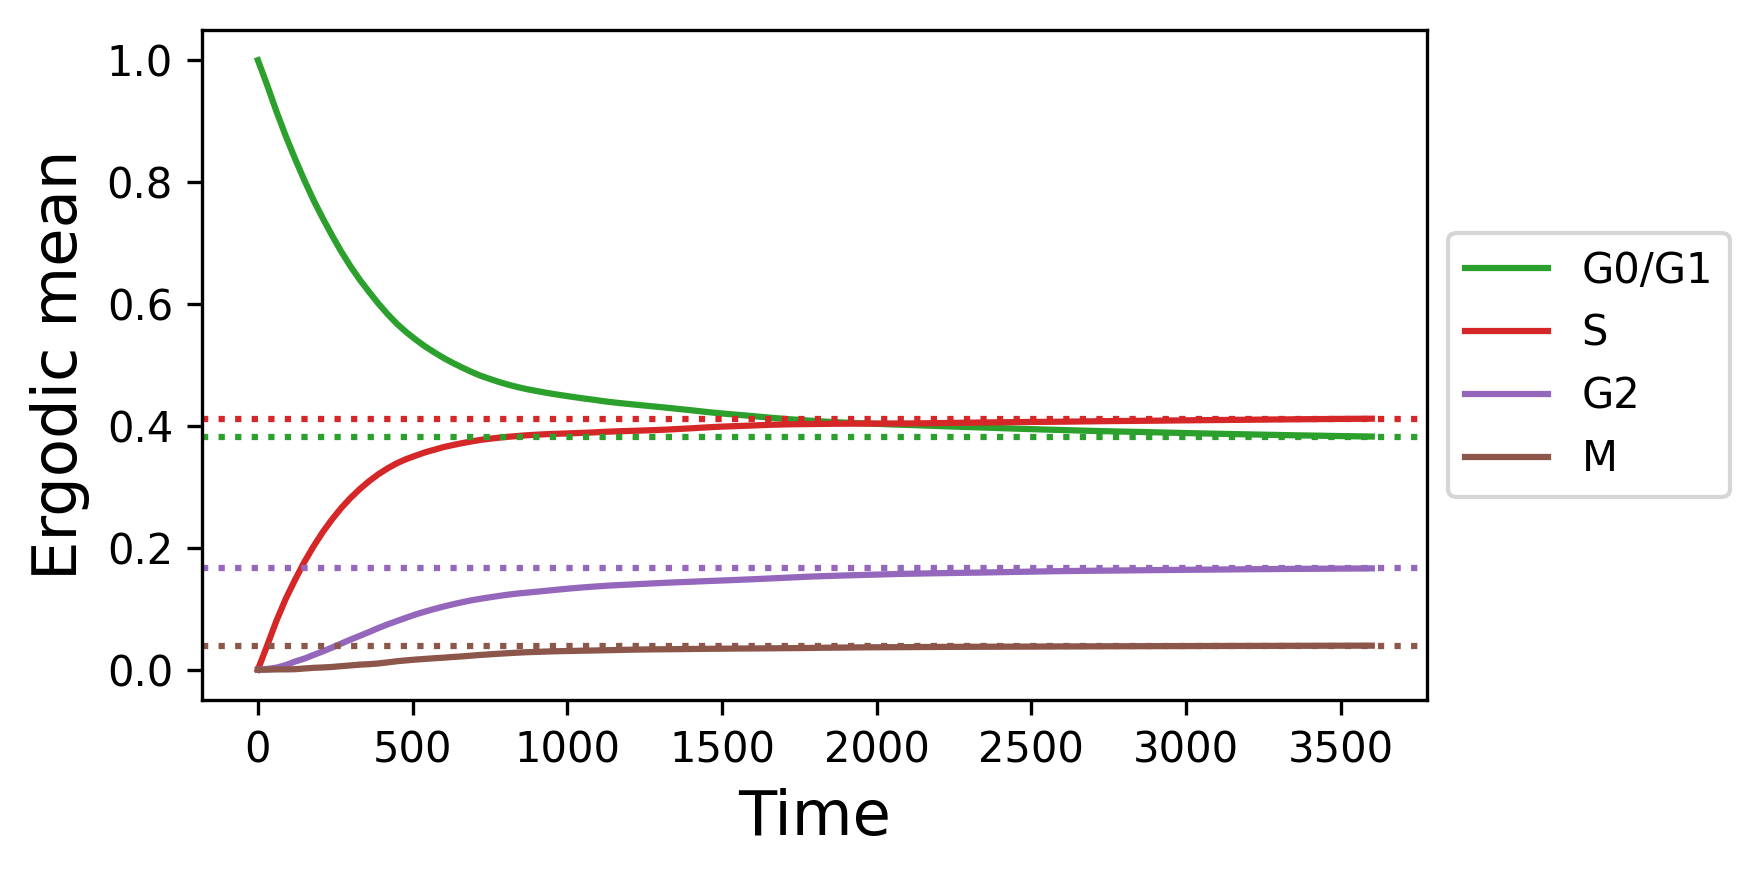

In [514]:
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
# plt.plot( times, apoptotic_ergodic_means , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( times, necrotic_ergodic_means , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

# plt.axhline( np.mean(apoptotic_fraction), color='tab:blue', linestyle=':' );
# plt.axhline( np.mean(necrotic_fraction), color='tab:orange', linestyle=':' );
if cycle_model == 0:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_premitotic_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_postmitotic_fraction), color='tab:purple', linestyle=':' );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_ergodic_means , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_fraction), color='tab:red', linestyle=':' );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_ergodic_means , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(G2M_phase_fraction), color='tab:purple', linestyle=':' );
elif cycle_model == 5:
    plt.plot( times, live_ergodic_means , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.axhline( np.mean(live_fraction), color='tab:green', linestyle=':' );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_ergodic_means , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_ergodic_means , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(G2_phase_fraction), color='tab:purple', linestyle=':' );
    plt.axhline( np.mean(M_phase_fraction), color='tab:brown', linestyle=':' );
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Ergodic means', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Ergodic mean', size=15 )
plt.savefig(os.path.join(output_folder, "ergodic_mean.pdf"), bbox_inches = 'tight')